Rejection Sampling
Rejection sampling is a basic Monte Carlo technique to generate observations from a specified
distribution with probability density function (pdf) f(x). In practice, it is used to
draw random variables from a target distribution, f(x), when directly sampling from that
distribution is difficult. The basic idea is to instead sample from a reference distribution,
g(x), which a) is easy to draw from and b) satisfies the condition that g(x) > 0 whenever
f(x) > 0, and to then selectively accept samples such that sampling from f is achieved.
The basic rejection sampling algorithm is the following:

Begin with a reference distribution, g and a scalar M such that f(x) < Mg(x) for all
x.
• Until a specified number of samples is achieved:
1. Sample a candidate, xc, from g(x) and a value u from a uniform distribution over
[0, 1] (Hint: See scipy.stats.uniform)
2. if u < f(x_c)
M g(x_c)
then accept xc as a sample from f(x), else reject xc.

#### Reference: Kevin's notebook

# Part a

In [1]:
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
norm.rvs()

1.174218638905662

In [3]:
norm.rvs(size = 3)[0]

1.7911056621453862

In [4]:
#############################################################
###--------------- Target Distribution -------------------###
#############################################################

def target_func(x):
    '''
    Input: scalar
    Description: a sample target function
    '''
    return(x/5)

def oneD_rej_sample(target_dist, ref_dist, sample_size, m):
    '''
    Input: 
        target_dist - target distribution
        ref_dist - reference distribution
        sample_size - desired sample size
        m - scalar m such that f(x) < m g(x)
    Output: a list of samples, prints the value of m, and the percentage of samples that were accepted
    Description:
    '''
    samples = []      # Initializing samples
    rejects = []      # Initializing rejected samples
    
    ref = ref_dist
    tar = target_dist
    n = sample_size
    
    while len(samples) < n:
        x = ref.rvs(size = 1)[0]
        u = scipy.stats.uniform.rvs(size=1)[0]
        #------- Rejection Sampling Step --------#
        if u < (tar(x)/float(m*ref.pdf(x))): 
            samples.append(x)
        else:
            rejects.append(x)
        
    perc = 100*(len(samples)/(len(samples) + len(rejects)))
        
    print("samples: \n", samples, "\n", "m = ", m, "\n", "% accepted", perc, "%")
    return(samples)
    
result = oneD_rej_sample(target_func, scipy.stats.norm(0,1), 20, 2)
    

samples: 
 [0.73289430992782878, 1.1924599549992387, 1.6142177689642605, 1.4079432656531201, 2.4011424214417141, 0.89039604806969486, 1.4550895489554105, 0.63380586535100492, 2.2226871455049797, 0.83041186700029468, 2.3469292381192739, 1.053022339967107, 2.0340188673411062, 1.1972163689296595, 0.51895242859481083, 1.9112453194929313, 1.4149564698451467, 0.35058868132760845, 1.2145494641498884, 1.6724972040513872] 
 m =  2 
 % accepted 16.94915254237288 %


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([ 2.,  2.,  2.,  1.,  3.,  3.,  2.,  1.,  1.,  3.]),
 array([ 0.35058868,  0.55564406,  0.76069943,  0.9657548 ,  1.17081018,
         1.37586555,  1.58092093,  1.7859763 ,  1.99103167,  2.19608705,
         2.40114242]),
 <a list of 10 Patch objects>)

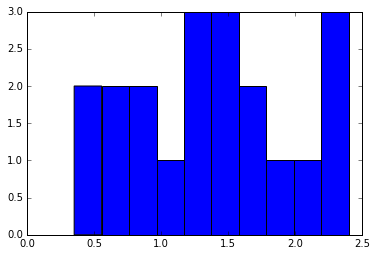

In [6]:
hist(result)

In [7]:
scipy.stats.norm(0,1).rvs()

-0.874099545679634

In [54]:
scipy.stats.norm?

# Part b: 
The Laplace distribution (a.k.a. double exponential distribution) has the pdf
f(x) = 1
2b
exp
−
|x − µ|
b
!
(1)
Use your rejection sampler to draw a sample of size 1000 from the Laplace distribution
with parameters µ = 0, b = 1. Use a Cauchy distribution as the reference distribution.
Plot a histogram of your samples, over-plotting the true Laplace pdf. Use a
Kolmogorov-Smirnov test to test the hypothesis that your sample was drawn from a
Laplace(0,1) distribution.

In [8]:
def laplace(x):
    import math
    b=1
    mu=0
    return (1/float(2*b))*math.exp((-(math.fabs(x-mu))/b))

In [9]:
def target_func(x):
    '''
    Input: scalar
    Description: a sample target function - Laplace in this case
    '''
    ans = (1/2)*exp(-abs(x))
    return ans

False

In [10]:
scipy.stats.cauchy.rvs()

1.5045186547083551

In [11]:
m = 2
laplacian_sample = oneD_rej_sample(target_func, scipy.stats.cauchy, 1000, m)

samples: 
 [5.1114649627419579, -0.2915695155175631, 1.2327295081508474, 1.282610440682149, -1.7423950214520816, -0.40989958755159828, -0.43754632049260006, 0.24109344722193982, 0.52148685756776736, -0.13220910878507897, 0.45356548155542298, 3.9160286359070149, 1.7538951185393896, -0.39609739045452769, 2.9489785755518643, -1.1429458696477077, -1.090766879219278, 0.21821690720674469, -0.53629550655723257, -0.12489999392900748, -0.19435285582946979, 0.98138223995138363, 3.3907623747323266, -0.21793699482957204, -1.0969476762285542, -0.53695951979849299, 0.9844324459674868, -0.1303833872554068, 1.7868739581047246, -0.17165959411534559, 0.23824165983003573, -0.16334541283575754, -1.6422603107141338, 0.12666699588648361, 0.05749056620938342, -1.5854467147718565, 0.31164490259174571, -1.7515071792795633, -2.0518876825602606, -1.3769371899470957, 0.31078394465739756, -0.093409094806519433, 1.6827720614617654, -0.66192244778833587, -1.2417657839362659, 2.288885367036829, 2.7106821993340264, -0

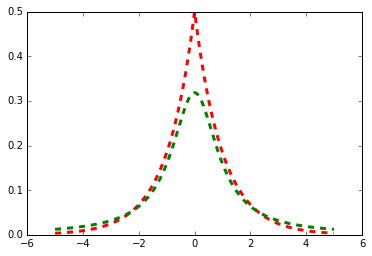

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  6.3944969387e-59


In [12]:
#over plot true Laplace pdf
x = np.arange(-5,5,.005)
laplace_pdf = np.arange(-5,5,.005)
cauchy_pdf = np.arange(-5,5, .005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
    cauchy_pdf[i]= scipy.stats.cauchy.pdf(float(x[i]))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, laplace_pdf, 'r--', linewidth=3)
ax.plot(x, cauchy_pdf, 'g--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(cauchy_pdf, laplace_pdf)
print("pvalue = ", pvalue)

In [111]:
scipy.stats.ks_2samp?

In [113]:
scipy.stats.laplace.rvs?

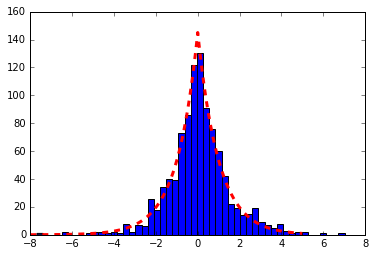

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  0.273158267709


In [13]:
#plot histogram of samples
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(laplacian_sample,bins=50)

#over plot true Laplace pdf
x = np.arange(-8,5,.005)
laplace_pdf = np.arange(-8,5,.005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
ax.plot(x,580/2*laplace_pdf, 'r--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(laplacian_sample, scipy.stats.laplace.rvs(size = 10))
print("pvalue = ", pvalue)


### Result Interpretation
We fail to reject the null hypothesis at the 5% significance level and conclude that we cannot statistically differentiate the generated sample from that generated directly from the Laplace distribution.

In [81]:
scipy.stats.laplace.pdf?

## Part c: 

In [14]:
m = 2
laplacian_sample = oneD_rej_sample(target_func, scipy.stats.t(df = 2), 1000, m)

samples: 
 [-1.9175460483008642, -0.17324820817805278, 1.3814638499287748, 0.18735108522629787, 0.68275684143130166, -0.78899151033089854, 1.2692323796380429, -0.055972434985611587, -0.072534518582940563, 2.1671327488732475, -3.7767795682395588, -0.27859059835554817, 0.89645852619655308, 1.271767108122094, 1.2438478416528143, 0.94329481504981927, 0.40590617043344535, -1.0952813369537406, 0.45142160491031141, 0.75385794500765657, -0.16280790614786836, 0.33140045964730319, 0.097392674749914504, 0.21807374347430938, -1.5553204668341676, -0.79093526872034914, -0.41062686795697456, -0.58243207906173267, 1.2329348128275197, -0.11499253974131352, 0.93032904383337545, -0.54069875252171662, -0.10045484104750559, 0.13379111174560193, -0.11022272035481998, 1.5560829443061939, -1.3251748024519809, 0.31336533049818083, -0.70040719292544984, -0.90079249158448538, 0.73168155722257755, 0.91930529514921744, 0.037838944087732522, 0.6044483774968199, 1.7529874361953408, 1.8969359852215479, 0.681419001923

In [125]:
scipy.stats.t.pdf?

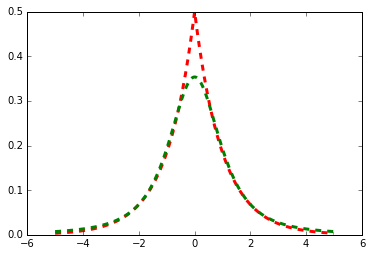

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  4.02585351088e-20


In [15]:
#over plot true Laplace pdf
x = np.arange(-5,5,.005)
laplace_pdf = np.arange(-5,5,.005)
t_pdf = np.arange(-5,5, .005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
    t_pdf[i]= scipy.stats.t.pdf(df = 2, x = float(x[i]))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, laplace_pdf, 'r--', linewidth=3)
ax.plot(x, t_pdf, 'g--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(t_pdf, laplace_pdf)
print("pvalue = ", pvalue)

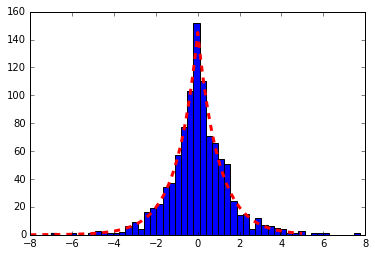

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  0.914691275411


In [16]:
#plot histogram of samples
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(laplacian_sample,bins=50)

#over plot true Laplace pdf
x = np.arange(-8,5,.005)
laplace_pdf = np.arange(-8,5,.005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
ax.plot(x,580/2*laplace_pdf, 'r--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(laplacian_sample, scipy.stats.laplace.rvs(size = 40))
print("pvalue = ", pvalue)

### Result Interpretation
We fail to reject the null hypothesis at the 5% significance level and conclude that we cannot statistically differentiate the generated sample from that generated directly from the Laplace distribution.